In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal

## Problem 1

### A

Choosing background value to be 2 and hypothetical source to be 8.

In [2]:
CR_Background = 2
gamma_rays = 8

In [3]:
def convolve(dist,n=2,mode='full'):
    if n == 1:
        return dist
    convolution = signal.convolve(dist,dist,mode=mode)
    for a in range(n-2):
        convolution = signal.convolve(convolution,dist,mode=mode)
    return convolution

In [4]:
def poisson_plots(avg=False):
    k = np.linspace(0,20,21)
    poisson = stats.poisson.pmf(k,mu=CR_Background)
    num_days = [1,2,5,10]

    plt.rcParams["figure.figsize"] = (25,7)
    fig, ax = plt.subplots(1, 2)
    plt.tick_params(labelsize = 10)

    ax[0].set_title('Poisson Probability Distributions of Cosmic-Ray Background, $\lambda$ = 2')
    ax[0].set_xlim(0,45)
    if avg:
        ax[0].set_xlim(0,8)

    ax[1].set_yscale('log')
    ax[1].set_title('Log Plot of Probability Distributions')

    for idx,val in enumerate(num_days):
        k = np.linspace(0,20*val,20*val+1)
        if avg:
            k = k/(val)
        ax[0].step(k,convolve(poisson,n=val),where='mid',linewidth=4,label=f'{val}')
        ax[1].plot(k,convolve(poisson,n=val),linewidth=3,label=f'{val}')


    for i in range(2):
        ax[i].set_xlabel('Num Events (k)')
        ax[i].set_ylabel('Probability')
        ax[i].legend(title = 'Num Days',fontsize='large')

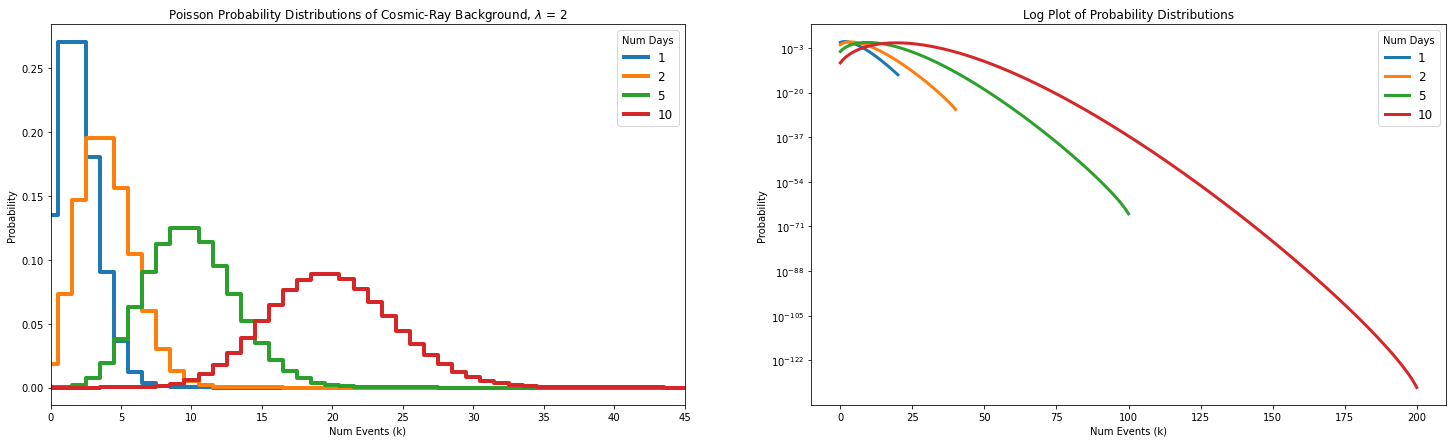

In [5]:
poisson_plots()

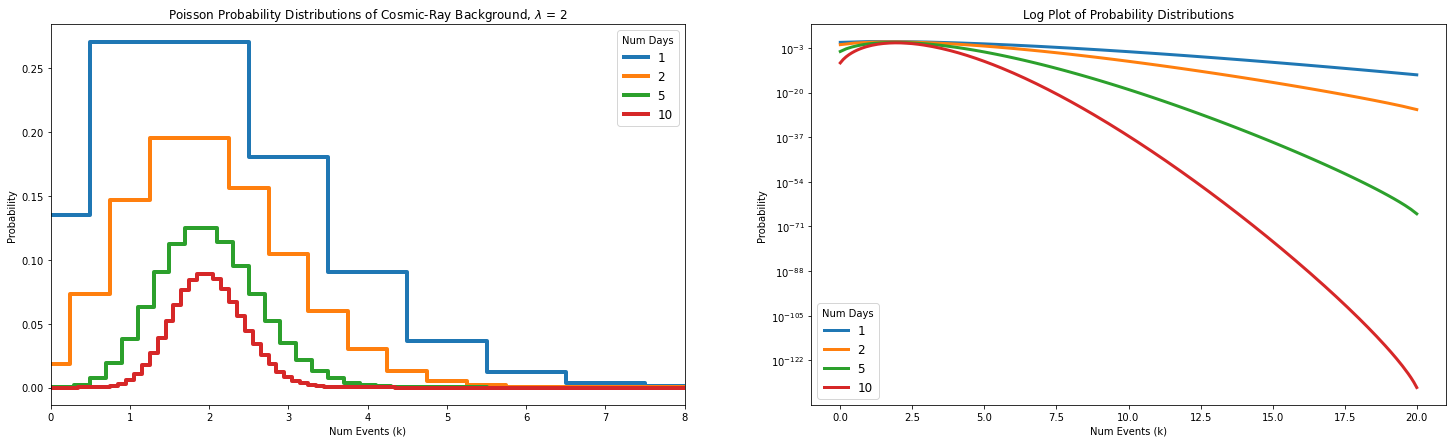

In [6]:
poisson_plots(avg=True)

### D)
Choosing 5 as my number of days, I would see 40 gamma rays.

In [7]:
k = np.linspace(0,20,21)
poisson = stats.poisson.pmf(k,mu=CR_Background)

dist = convolve(poisson,n=5)
probability = sum(dist[40:])
print(probability)

7.341405446132749e-13


In [8]:
stats.norm.ppf

<bound method rv_continuous.ppf of <scipy.stats._continuous_distns.norm_gen object at 0x7f9f25d13be0>>